In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline

#plt.style.use('default')

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id': '1BFMOae6_mh0FAADOEAmMgKEyxVLnyLx-'})
downloaded.GetContentFile('train_labels.csv')

downloaded = drive.CreateFile({'id': '1H-6GzuPgEkHrJuA0ZN932tyAynasX231'})
downloaded.GetContentFile('train_values.csv')

In [ ]:
trainLabels = pd.read_csv('train_labels.csv')
trainValues = pd.read_csv('train_values.csv')

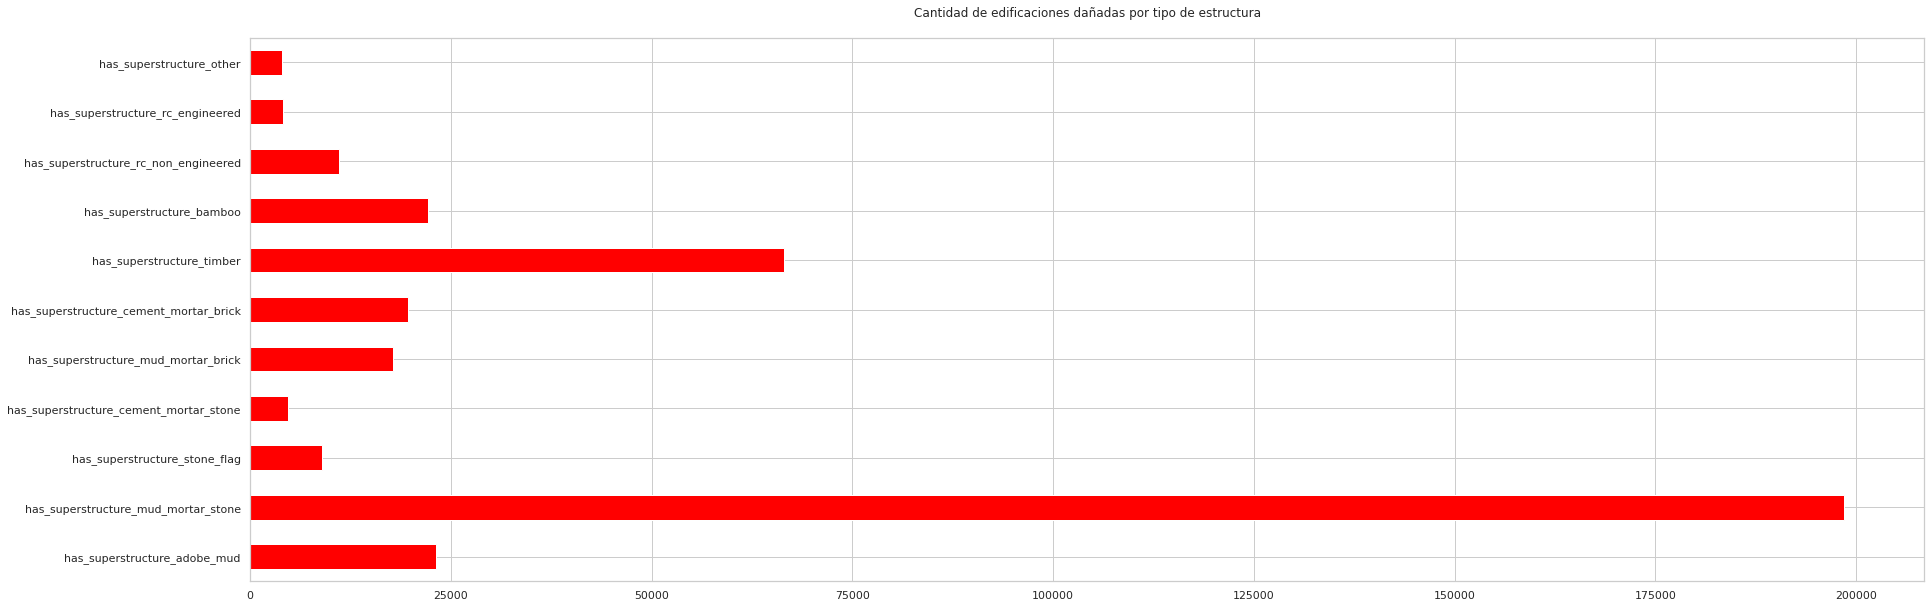

In [ ]:
tipos_estructura=trainValues.iloc[:, pd.np.r_[15:26]]
tipos_estructura.sum().plot(kind="barh", title="Cantidad de edificaciones dañadas por tipo de estructura\n", color="Red")

In [ ]:
tipos_estructura=trainValues.iloc[:, pd.np.r_[0, 15:26]]
danio_estructura=tipos_estructura.merge(trainLabels, left_on='building_id', right_on='building_id')
danio_estructura=danio_estructura.groupby(['building_id']).sum().reset_index().iloc[:, 1:13].groupby('damage_grade').sum()
danio_estructura

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
damage_grade,,,,,,,,,,,
1,594,8760,182,829,623,7105,7642,2839,3857,2656,656
2,13902,113947,4534,3248,11698,11421,40187,14001,5832,1402,2248
3,8605,75854,4231,675,5440,1089,18621,5314,1410,75,1001


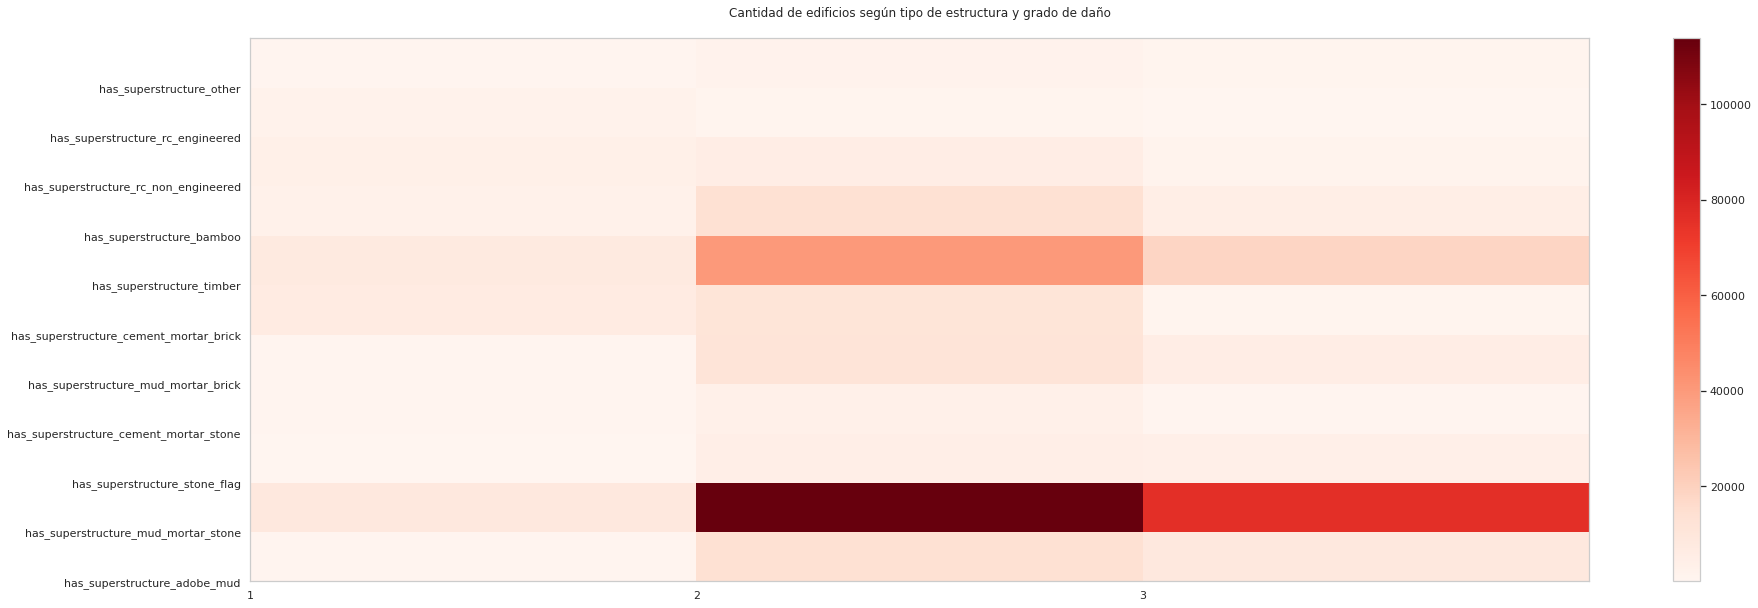

In [ ]:
danio_estructuraT = danio_estructura.transpose()
plt.pcolor(danio_estructuraT, cmap ="Reds")
plt.yticks(range(len(danio_estructuraT.index)), danio_estructuraT.index)
plt.xticks(range(len(danio_estructuraT.columns)), danio_estructuraT.columns)
plt.colorbar()
plt.title("Cantidad de edificios según tipo de estructura y grado de daño\n")
plt.show()

In [ ]:
tipos_estructura_zona=trainValues.iloc[:, pd.np.r_[0:2, 15:26]]
estructura_zona=tipos_estructura_zona.groupby(['building_id', 'geo_level_1_id']).sum().reset_index().iloc[:, 1:13].groupby('geo_level_1_id').sum()
estructura_zona.head()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
geo_level_1_id,,,,,,,,,,,
0,170,3709,107,238,223,72,999,264,227,6,23
1,241,2567,4,67,202,20,425,174,181,10,26
2,39,838,87,23,52,14,272,179,9,17,168
3,4457,1470,55,61,3950,870,1052,388,345,122,179
4,69,14259,518,131,13,63,2522,1469,452,44,197


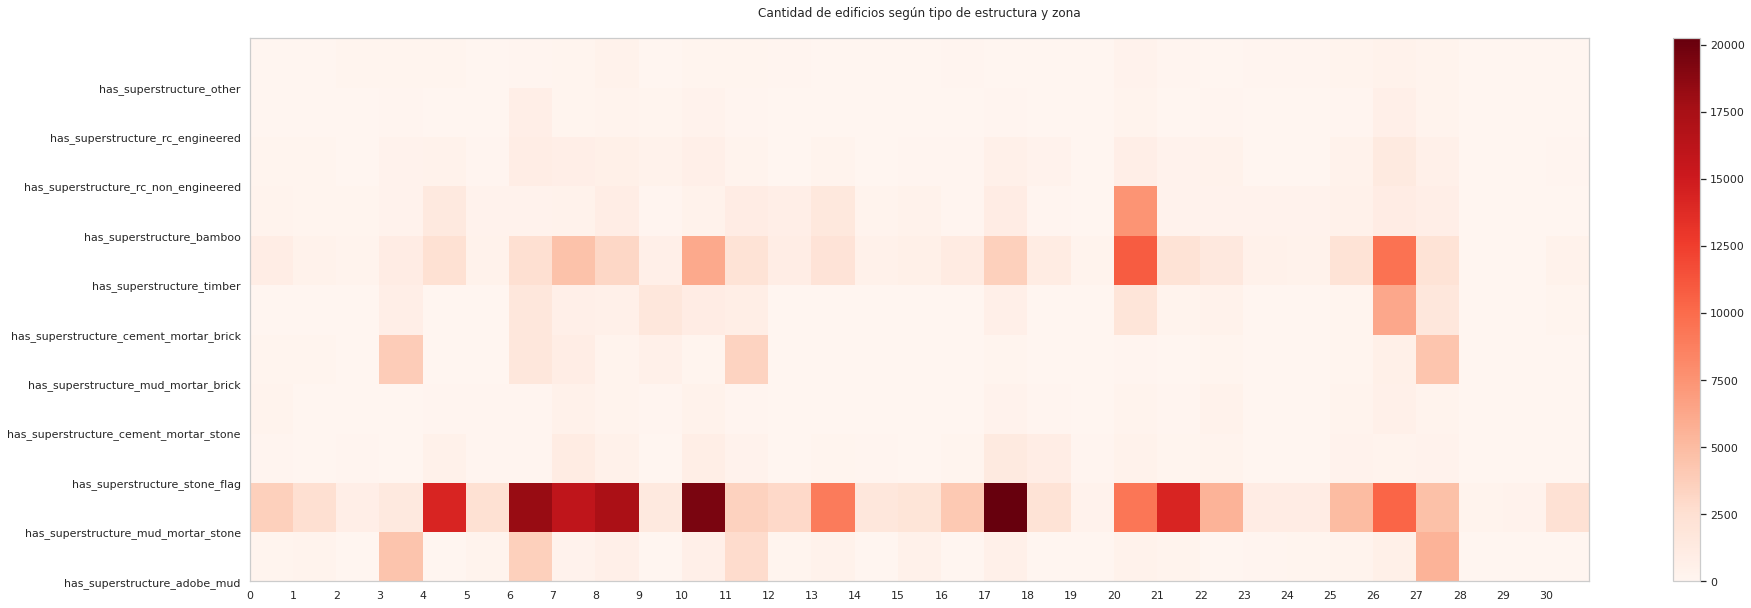

In [ ]:
estructura_zonaT = estructura_zona.transpose()
plt.pcolor(estructura_zonaT, cmap ="Reds")
plt.yticks(range(len(estructura_zonaT.index)), estructura_zonaT.index)
plt.xticks(range(len(estructura_zonaT.columns)), estructura_zonaT.columns)
plt.colorbar()
plt.title("Cantidad de edificios según tipo de estructura y zona\n")
plt.show()

In [ ]:
tipos_estructura_edad=trainValues.iloc[:, pd.np.r_[0, 5, 15:26]]
tipos_estructura_edad=tipos_estructura_edad.groupby(['building_id', 'age']).sum().reset_index().iloc[:, 1:13].groupby('age').sum()
tipos_estructura_edad.head()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
age,,,,,,,,,,,
0,702,15248,825,811,488,4719,6766,2757,2474,1400,541
5,1317,22581,1072,905,866,4764,9413,3502,2439,1228,533
10,1997,29905,1335,721,1274,3313,10695,3685,1778,729,485
15,2121,29594,1301,659,1383,2102,9657,3154,1296,394,515
20,2677,26761,1057,553,1620,1686,8043,2571,987,206,434


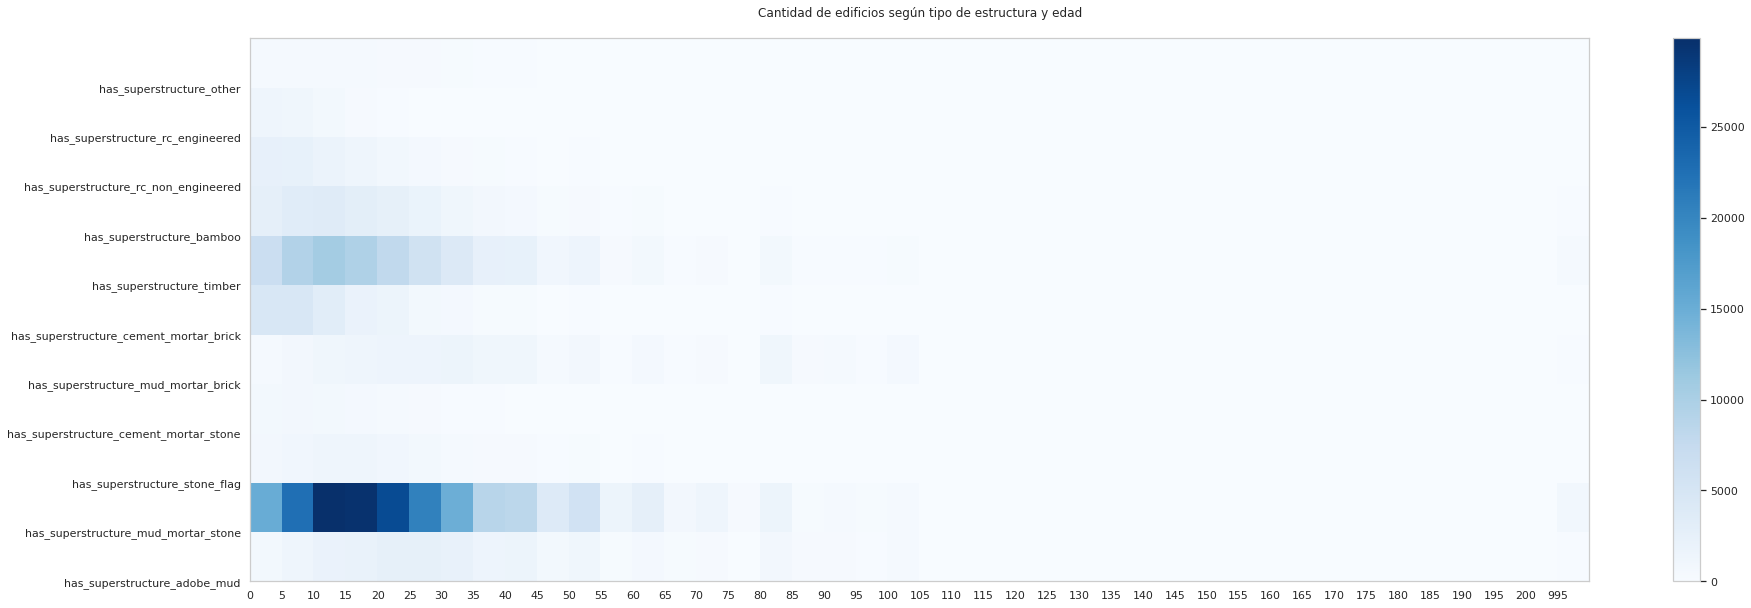

In [ ]:
tipos_estructura_edadT = tipos_estructura_edad.transpose()
plt.pcolor(tipos_estructura_edadT, cmap ="Blues")
plt.yticks(range(len(tipos_estructura_edadT.index)), tipos_estructura_edadT.index)
plt.xticks(range(len(tipos_estructura_edadT.columns)), tipos_estructura_edadT.columns)
plt.colorbar()
plt.title("Cantidad de edificios según tipo de estructura y edad\n")
plt.rcParams["figure.figsize"] = [30, 10]
plt.show()